<a href="https://colab.research.google.com/github/Yashsethi24/INSY_Individual_Project/blob/main/INSY_661_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Developing the model ###

# Load Libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import data
kickstarter_df = pandas.read_excel("Kickstarter.xlsx")

NameError: name 'pandas' is not defined

In [ ]:
!pip install pandas

# Pre-Processing

In [ ]:
kickstarter_df = kickstarter_df.dropna()

# Looking at different values of "state"
kickstarter_df['state'].value_counts()

# Keeping the rows where state is successful or failed else drop
kickstarter_df = kickstarter_df[kickstarter_df['state'].isin(['successful', 'failed'])]

kickstarter_df['state'] = kickstarter_df['state'].apply(lambda x: 1 if x=='successful' else 0)

In [ ]:
kickstarter_df.shape

# EDA

In [ ]:
# View the distribution of 'goal' values for each state
kickstarter_df.groupby('state')['goal'].describe()

In [ ]:
# View the distribution of 'pledged' values for each state
kickstarter_df.groupby('state')['pledged'].describe()

In [ ]:
# Checking distribution of "disable_communication"
kickstarter_df['disable_communication'].value_counts()

Since the column "disable_communication" has only one unique value, this is not informative about the final state and hence can be dropped.

In [ ]:
# Dropping column "disable_communication"
kickstarter_df = kickstarter_df.drop(['disable_communication'], axis=1)

In [ ]:
kickstarter_df['country'].value_counts().shape

In [ ]:
# Checking value counts of currency
print(kickstarter_df['currency'].value_counts())

In [ ]:
# View the distribution of 'state' values for each country
kickstarter_df.groupby('country')['state'].value_counts().head(10)

In [ ]:

# Minimum deadline
min_deadline = kickstarter_df['deadline'].min()
print(f"Minimum Deadline: {min_deadline}")

# Maximum deadline
max_deadline = kickstarter_df['deadline'].max()
print(f"Maximum Deadline: {max_deadline}")

# Example: Count the number of projects with deadlines in each year
kickstarter_df['deadline_year'] = kickstarter_df['deadline'].dt.year
deadline_distribution = kickstarter_df['deadline_year'].value_counts().sort_index()
print("\nDistribution of Deadlines by Year:")
deadline_distribution

In [ ]:
# Group by 'deadline_year' and 'state', then count the occurrences
state_by_year = kickstarter_df.groupby(['deadline_year', 'state'])['state'].count().unstack()

# Display the distribution
print("\nDistribution of State by Year:")
state_by_year

In [ ]:
# Calculate the difference between 'state_changed_at' and 'deadline' in days
kickstarter_df['deadline'] = pd.to_datetime(kickstarter_df['deadline'])
kickstarter_df['state_changed_at'] = pd.to_datetime(kickstarter_df['state_changed_at'])

kickstarter_df['time_diff'] = (kickstarter_df['state_changed_at'] - kickstarter_df['deadline']).dt.days

# Display the value counts of the difference
print(kickstarter_df['time_diff'].value_counts())

We will assume that the **state changed date** represents the **decision date**, which indicates when the outcome of the project—whether it was successful or not—was determined. (Since the state changed date is same as deadline.)

In [ ]:
# Number of projects by year
project_counts_by_year = kickstarter_df.groupby(kickstarter_df['created_at'].dt.year)['created_at'].count()
print("\nNumber of projects by year (based on created_at):")
print(project_counts_by_year)

In [ ]:
# Group by 'created_at' and 'state', then count the occurrences
created_state_counts = kickstarter_df.groupby([kickstarter_df['created_at'].dt.year, 'state'])['state'].count().unstack()

# Display the distribution
print("\nDistribution of State by Created Year:")
created_state_counts

In [ ]:
# Number of projects by year
project_counts_by_year = kickstarter_df.groupby(kickstarter_df['launched_at'].dt.year)['launched_at'].count()
print("\nNumber of projects by year (based on launched_at):")
print(project_counts_by_year)

In [ ]:
# Group by 'created_at' and 'state', then count the occurrences
created_state_counts = kickstarter_df.groupby([kickstarter_df['launched_at'].dt.year, 'state'])['state'].count().unstack()

# Display the distribution
print("\nDistribution of State by Created Year:")
created_state_counts

In [ ]:
# Calculate the difference between 'launched_at' and 'created_at' in months
kickstarter_df['launched_at'] = pd.to_datetime(kickstarter_df['launched_at'])
kickstarter_df['created_at'] = pd.to_datetime(kickstarter_df['created_at'])
kickstarter_df['months_diff'] = (kickstarter_df['launched_at'] - kickstarter_df['created_at']).dt.days / 30

# Create month difference buckets
bins = [0, 1, 3, 6, 12, float('inf')]
labels = ['0-1 Month', '1-3 Months', '3-6 Months', '6-12 Months', '12+ Months']
kickstarter_df['months_diff_buckets'] = pd.cut(kickstarter_df['months_diff'], bins=bins, labels=labels, right=False)

# Display value counts without ordering
kickstarter_df['months_diff_buckets'].value_counts(sort=False)

In [ ]:
# Group by 'months_diff_buckets' and 'country', then count the occurrences of each state
state_by_month_country = kickstarter_df.groupby(['months_diff_buckets'])['state'].value_counts().unstack()

# Display the distribution
print("\nDistribution of State by Month Difference Buckets and Country:")
state_by_month_country

In [ ]:
kickstarter_df['months_diff'].describe()

In [ ]:
# Check if 'spotlight' column exists in your DataFrame
if 'spotlight' in kickstarter_df.columns:
    unsuccessful_spotlight_projects = kickstarter_df[(kickstarter_df['state'] == 0) & (kickstarter_df['spotlight'] == 1)]
    if not unsuccessful_spotlight_projects.empty:
        print("Unsuccessful projects in spotlight:")
        print(unsuccessful_spotlight_projects)
    else:
        print("No unsuccessful projects found in the spotlight.")
else:
    print("The column 'spotlight' does not exist in the DataFrame.")

"Spotlight" is a future column, hence needs to be dropped.

In [ ]:
# prompt: check the distribution of name_len by state

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative way to visualize: Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='name_len', data=kickstarter_df)
plt.title('Distribution of Name Length by State (Box Plot)')
plt.xlabel('State')
plt.ylabel('Name Length')
plt.show()

In [ ]:
# prompt: check the distribution of name_len_clean by state

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative way to visualize: Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='name_len_clean', data=kickstarter_df)
plt.title('Distribution of Clean Name Length by State (Box Plot)')
plt.xlabel('State')
plt.ylabel('Clean Name Length')
plt.show()

In [ ]:
# prompt: check the distribution of blurb_len by state

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative way to visualize: Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='blurb_len', data=kickstarter_df)
plt.title('Distribution of Blurb Length by State (Box Plot)')
plt.xlabel('State')
plt.ylabel('Clean Name Length')
plt.show()

In [ ]:
# prompt: check the distribution of blurb_len_clean by state

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative way to visualize: Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='blurb_len_clean', data=kickstarter_df)
plt.title('Distribution of Clean Blurb Length by State (Box Plot)')
plt.xlabel('State')
plt.ylabel('Clean Name Length')
plt.show()

In [ ]:
# Convert 'deadline' to datetime if it's not already
kickstarter_df['deadline'] = pd.to_datetime(kickstarter_df['deadline'])

# Extract the weekday from the 'deadline' column
kickstarter_df['deadline_weekday'] = kickstarter_df['deadline'].dt.dayofweek # Monday=0, Sunday=6

# Group by deadline weekday and state, then calculate the percentage
weekday_state_percentage = kickstarter_df.groupby('deadline_weekday')['state'].value_counts(normalize=True) * 100

# Display the percentage distribution
weekday_state_percentage

In [ ]:
kickstarter_df['time_to_launch'].head()

In [ ]:
kickstarter_df.columns

In [ ]:
list_dist = [ 'staff_pick',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'main_category', 'staff_pick.1', 'show_feature_image',
       'video']

for column in list_dist:
  # Group by deadline weekday and state, then calculate the percentage
  state_percentage = kickstarter_df.groupby(column)['state'].value_counts(normalize=True) * 100

  # Display the percentage distribution
  print(state_percentage)

In [ ]:
kickstarter_df['show_feature_image'].value_counts()

In [ ]:
# Dropping column staff_pick.1 and staff_pick since they are future information
kickstarter_df = kickstarter_df.drop(['staff_pick.1', 'staff_pick'], axis=1)

In [ ]:
kickstarter_df['main_category'].value_counts()

In [ ]:
#  Drop unneccesary predictors
kickstarter_df = kickstarter_df.drop(columns=['state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr','time_diff'], errors='ignore')


In [ ]:
# Drop predictors obtained after project is launched
kickstarter_df = kickstarter_df.drop(columns=['backers_count','pledged','spotlight'])

In [ ]:
kickstarter_df['goal_usd'] = kickstarter_df['static_usd_rate'] * kickstarter_df['goal']

In [ ]:
# Drop unneccesary predictors
kickstarter_df = kickstarter_df.drop(columns=['id', 'name','currency','name_len_clean','name_len','goal', 'static_usd_rate','usd_pledged','months_diff_bucket'])

In [ ]:
kickstarter_df.info()

In [ ]:
# Dummify variables - Part 1
kickstarter_df = pandas.get_dummies(kickstarter_df)
# Dummify variables - Part 2
kickstarter_df = pandas.get_dummies(kickstarter_df, columns = ['deadline_month','deadline_day','deadline_yr','deadline_hr'])
# Dummify variables - Part 3
kickstarter_df = pandas.get_dummies(kickstarter_df, columns = ['created_at_month','created_at_day','created_at_yr','created_at_hr'])
# Dummify variables - Part 4
kickstarter_df = pandas.get_dummies(kickstarter_df, columns = ['launched_at_month','launched_at_day','launched_at_yr','launched_at_hr'])


In [ ]:

##############################################################################
# Feature Selection
X = kickstarter_df.loc[:, kickstarter_df.columns != 'state']
y = kickstarter_df['state']


In [ ]:
# Get a list of columns with non-numeric data types
cols_to_drop = [col for col in kickstarter_df.columns
                if not pd.api.types.is_numeric_dtype(kickstarter_df[col])]

# Drop the columns
kickstarter_df = kickstarter_df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
kickstarter_df.info()

# Anomalies detection

In [ ]:
# Removing anomalies with Isolation Forest

# Create isolation forest model
# Contamination parameter of 0.05 to get ~700 (~5%) of total anomalies (14214)
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100, contamination=.05, random_state = 5)
pred = iforest.fit_predict(kickstarter_df)
score = iforest.decision_function(kickstarter_df)

In [ ]:
# Extracting anomalies
from numpy import where
anom_index = where(pred==-1)
values = kickstarter_df.iloc[anom_index]

# Remove anomalies from dataset
kickstarter_df = pd.concat([kickstarter_df, values, values]).drop_duplicates(keep=False)
X = kickstarter_df.loc[:, kickstarter_df.columns != 'state']
y = kickstarter_df['state']

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state = 5)
model_classifier = randomforest.fit(X, y)

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model_classifier)
sfm.fit(X, y)
coef_rf = pd.DataFrame(list(zip(X.columns,model_classifier.feature_importances_)), columns = ['predictor','Gini_coefficient']).sort_values('Gini_coefficient',ascending = False)
coef_rf.head(10)

In [ ]:
relevant_predictors = coef_rf[coef_rf['Gini_coefficient']>0.0025].predictor.values

In [ ]:
relevant_predictors

In [ ]:
X = X[relevant_predictors]

##############################################################################
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# Decision Tree Classifier

In [ ]:
# prompt: create a decision tree classifier with multiple hyperparameters and using cross validation to get the optimal parameters

import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are defined from the previous code
# ... (Your existing code for data loading and preprocessing) ...

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=5)

# Create the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


# Evaluate the model on the testing set
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

In [ ]:

# Run Decision Tree
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(random_state=5, max_depth = 10)
model1 = cart.fit(X_train,y_train)

# Using the model to predict the results based on the test dataset
y_test_pred = model1.predict(X_test)

from sklearn import metrics
accuracy1 = metrics.accuracy_score(y_test, y_test_pred)
precision1 = metrics.precision_score(y_test, y_test_pred)
recall1 = metrics.recall_score(y_test, y_test_pred)
f11 = metrics.f1_score(y_test, y_test_pred)

summary1 = pandas.DataFrame(list(zip(['Accuracy', 'Precision', 'Recall', 'F1'],[accuracy1, precision1, recall1, f11])), columns = ['Metric','Score'])
print(summary1)

In [ ]:
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

# Random Forest Classifier

In [ ]:
# prompt: create a random forest classifier with multiple hyperparameters and using cross validation to get the optimal parameters

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=5)

# Create the GridSearchCV object for RandomForest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and best score for RandomForest
print("Best hyperparameters (Random Forest):", grid_search_rf.best_params_)
print("Best cross-validation score (Random Forest):", grid_search_rf.best_score_)

# Evaluate the Random Forest model on the testing set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

In [ ]:
recall2 = metrics.recall_score(y_test, y_test_pred)
f12 = metrics.f1_score(y_test, y_test_pred)
print("Recall:", recall2)
print("F1 Score:", f12)

In [ ]:
# Run Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5, max_depth = None, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)
model2 = rf.fit(X_train,y_train)
# Using the model to predict the results based on the test dataset
y_test_pred = model2.predict(X_test)

from sklearn import metrics
accuracy2 = metrics.accuracy_score(y_test, y_test_pred)
precision2 = metrics.precision_score(y_test, y_test_pred)
recall2 = metrics.recall_score(y_test, y_test_pred)
f12 = metrics.f1_score(y_test, y_test_pred)

summary2 = pandas.DataFrame(list(zip(['Accuracy', 'Precision', 'Recall', 'F1'],[accuracy2, precision2, recall2, f12])), columns = ['Metric','Score'])
print(summary2)

In [ ]:
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

# Gradient Boosting Classifier

In [ ]:
# prompt: create a GBM classifier with multiple hyperparameters and using cross validation to get the optimal parameters

from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # ,'subsample': [0.8, 0.9, 1.0]
}

# Create the GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(random_state=5)

# Create the GridSearchCV object for GradientBoosting
grid_search_gbm = GridSearchCV(gbm_classifier, param_grid_gbm, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_gbm.fit(X_train, y_train)

# Print the best hyperparameters and best score for GradientBoosting
print("Best hyperparameters (GBM):", grid_search_gbm.best_params_)
print("Best cross-validation score (GBM):", grid_search_gbm.best_score_)

# Evaluate the GBM model on the testing set
best_gbm = grid_search_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)
test_accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Test Accuracy (GBM):", test_accuracy_gbm)

#Other metrics
from sklearn import metrics
recall_gbm = metrics.recall_score(y_test, y_pred_gbm)
f1_gbm = metrics.f1_score(y_test, y_pred_gbm)
print("Recall (GBM):", recall_gbm)
print("F1 Score (GBM):", f1_gbm)

In [ ]:
##############################################################################
################################### GBM ######################################
##############################################################################

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=5, n_estimators = 100)

model3 = gbt.fit(X_train, y_train)
y_test_pred = model3.predict(X_test)

from sklearn import metrics
accuracy3 = metrics.accuracy_score(y_test, y_test_pred)
precision3 = metrics.precision_score(y_test, y_test_pred)
recall3 = metrics.recall_score(y_test, y_test_pred)
f13 = metrics.f1_score(y_test, y_test_pred)

##############################################################################

summary3 = pandas.DataFrame(list(zip(['Accuracy', 'Precision', 'Recall', 'F1'],[accuracy3, precision3, recall3, f13])), columns = ['Metric','Score'])
print(summary3)

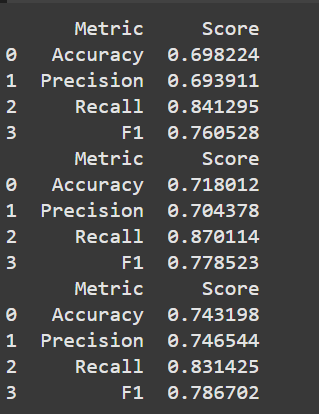

array(['goal_usd', 'date_diff_years', 'months_diff', 'time_to_launch',
       'blurb_len', 'blurb_len_clean', 'video', 'main_category_Food',
       'deadline_year', 'deadline_weekday', 'show_feature_image',
       'category_Web', 'category_Apparel', 'category_Shorts',
       'category_Documentary', 'main_category_Technology',
       'category_Accessories', 'category_Country & Folk',
       'main_category_Publishing', "category_Children's Books",
       'category_Mobile Games', 'main_category_Music', 'country_US'],
      dtype=object)

In [ ]:

# Setup the variables
X = kickstarter_df[["name_len","blurb_len"]]
y = kickstarter_df["state"]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# Build the model
decisiontree = DecisionTreeClassifier(max_depth=3)
model = decisiontree.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred = model.predict(X_test)

# Calculate the mean squared error of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)


## Grading ##

# Import Grading Data
kickstarter_grading_df = pandas.read_excel("Kickstarter-Grading.xlsx")

# Pre-Process Grading Data
kickstarter_grading_df = kickstarter_grading_df.dropna()

# Setup the variables
X_grading = kickstarter_grading_df[["name_len","blurb_len"]]
y_grading = kickstarter_grading_df["state"]

# Apply the model previously trained to the grading data
y_grading_pred = model.predict(X_grading)

# Calculate the accuracy score
accuracy_score(y_grading, y_grading_pred)